## AI CA

GitHub - https://github.com/Rfg2048/AI

## A1 - Identify the differences between a graph and a tree.

According to Cambridge Dictionary a graph is a picture that shows  how two sets of information or variables are related, usually by lines or curves, and a tree diagram shows the relationships between different pieces of information using lines that are connected and have different branches.

One of the main differences between graph and tree is the structure cycle, while graph can be connnected or disconnected, have cycles or loops and doesn't necessarily have a root node, the tree structure cycle relies on a single root node which is connected and acyclic (graph with no graph cycles).

While a graph can havy any number of edges directed or undirected, trees may only have $n$ being nodes, $n-1$ number of edges and they are always directed. Graphs are used normally to model complex systems or relationships, like social networks or computer networks. Trees are used to represent data with hierachy structure, such as dile systems pr organization charts.



## A2 - Explain in detail how the graph is an abstraction of the problem.

The graph is an abstraction of the problem in this case to model and analyze the routes and paths in a visual manner by using the nodes and edges to be each possible stage that can be reached, node A being starting point and node S being the end goal, its visible that there are many different paths and judging by the weight which is some sort of cost, better routes can be drawn and followed, once the fastest route, which would be the lower number path or the most point rewarding route, the path that adds more, are chosen they can be easily followed.

The graph provides a structured abstraction of the problem, in other words a feasible abstraction easy on the eyes.

## A3 - Identify the advantages of using a visualisation such as the one shown

There are many advantages by using a visual display of the information provided, such as easy understanding, by showing intuitive representation of the data that may or may not be complex, another advantage is the pathfiding, which in this case is the main goal of the graph, to arrive from point A to point S effectively and efficiently, another great advantage is the presentation, by visualization it gets easy to explain and present data regardless of its complexity, which can be filtered and broken down accordingly.

To summarize, visualization is a powerful tool for problem solving, data analysis and decision-making, they can improve understanding  and help with decisions from the insight given.

## B - Demonstrate how Dijkstra’s algorithm would find the shortest path to the solution in Fig.1 through diagrams and written explanation of each stage.

Firstly the figure is converted to a python graph for visualization

In [1]:
import heapq


def calculate_distances(graph, starting_vertex):
    distances = {vertex: float('infinity') for vertex in graph}
    distances[starting_vertex] = 0

    pq = [(0, starting_vertex)]
    while len(pq) > 0:
        current_distance, current_vertex = heapq.heappop(pq)

        # Nodes can get added to the priority queue multiple times. We only
        # process a vertex the first time we remove it from the priority queue.
        if current_distance > distances[current_vertex]:
            continue

        for neighbor, weight in graph[current_vertex].items():
            distance = current_distance + weight

            # Only consider this new path if it's better than any path we've
            # already found.
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(pq, (distance, neighbor))

    return distances

#Line of code provided in-class called Dijkstra's Algorithm used to determine the shortest path

In [2]:
fig1_graph = {
    'A': {'B': 1, 'C': 5, 'H': 2},
    'B': {'A': 1, 'C': 2, 'D': 4},
    'C': {'A': 5, 'B': 2, 'G': 1},
    'D': {'B': 4, 'E': 4, 'F': 7},
    'E': {'D': 4, 'F': 3, 'W': 6},
    'F': {'D': 7, 'E': 3, 'G': 2},
    'G': {'C': 1, 'F': 2, 'L': 3},
    'H': {'A': 2, 'J': 9, 'K': 5},
    'J': {'H': 9, 'K': 3, 'N': 6},
    'K': {'H': 5, 'J': 3, 'L': 5},
    'L': {'D': 7, 'G': 3, 'K': 5, 'M': 4, 'N': 3, 'V': 10, 'W': 8},
    'M': {'L': 4, 'P': 2, 'Q': 10},
    'N': {'J': 6, 'L': 3, 'P': 4, 'S': 7},
    'P': {'M': 2, 'N': 4, 'R': 5},
    'Q': {'M': 10, 'S': 8, 'W': 4},
    'R': {'P': 5, 'S': 4, 'T': 3},
    'S': {'N': 7, 'Q': 8, 'R': 4, 'T': 4, 'U': 2, 'V': 6},
    'T': {'R': 3, 'S': 4, 'U': 1},
    'U': {'S': 2, 'T': 1, 'V': 3},
    'V': {'L': 10, 'S': 6, 'U': 3, 'W': 5},
    'W': {'E': 6, 'L': 8, 'Q': 4, 'V': 5},
 }

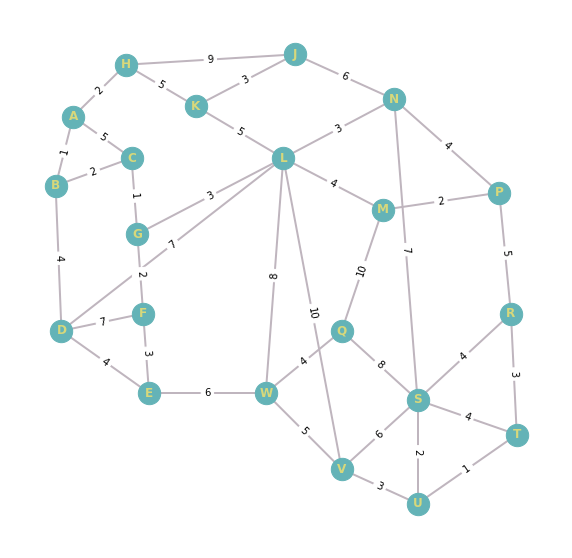

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

graph = nx.Graph()

#loop to create nodes and edges
for node, neighbors in fig1_graph.items():
    graph.add_node(node)
    for neighbor, weight in neighbors.items():
        graph.add_edge(node, neighbor, weight=weight)

#Setting fixed position for the nodes to create a replica of figure given

fix_node_position = {
    'A': (-0.6,1.2),
    'B':(-0.9,-0.8),
    'C':(0.4,0),
    'D':(-0.8,-5),
    'E':(0.7,-6.8),
    'F':(0.6, -4.5),
    'G':(0.5,-2.2),
    'H':(0.3,2.7),
    'J':(3.2,3),
    'K':(1.5,1.5),
    'L':(3,0),
    'N':(4.9,1.7),
    'M':(4.7,-1.5),
    'P':(6.7,-1),
    'Q':(4,-5),
    'R':(6.9,-4.5),
    'S':(5.3,-7),
    'T':(7,-8),
    'U':(5.3,-10),
    'V':(4,-9),
    'W':(2.7,-6.8)
}

pos = fix_node_position

node_label = {node: node for node in graph.nodes()}

edge_label = {(u,v): d['weight'] for u,v,d in graph.edges(data=True)}

edge_colors= "#bfb5be"

def draw_graph(graph, pos, node_label, edge_label, edge_colors):
    
    plt.figure(figsize=(10,10))
    
    #Drawing nodes and edges with letters and weight using networkx library
    nx.draw_networkx_nodes(graph, pos, node_size=500, node_color = "#64b3b7")
    nx.draw_networkx_edges(graph,pos, edge_color=edge_colors, width=2)
    nx.draw_networkx_labels(graph, pos, labels=node_label, font_color="#d7d87b", font_weight="bold")
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_label)

    plt.axis('off')
    plt.show()
    
draw_graph(graph, pos, node_label, edge_label, edge_colors)

After graph is constructed the Dijkstra's algorithm is used to calculate shortest path

In [4]:
import heapq


def calculate_distances(graph, starting_vertex):
    distances = {vertex: float('infinity') for vertex in graph}
    distances[starting_vertex] = 0

    pq = [(0, starting_vertex)]
    while len(pq) > 0:
        current_distance, current_vertex = heapq.heappop(pq)

        # Nodes can get added to the priority queue multiple times. We only
        # process a vertex the first time we remove it from the priority queue.
        if current_distance > distances[current_vertex]:
            continue

        for neighbor, weight in graph[current_vertex].items():
            distance = current_distance + weight

            # Only consider this new path if it's better than any path we've
            # already found.
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(pq, (distance, neighbor))

    return distances

#Line of code provided in-class called Dijkstra's Algorithm used to determine the shortest path

In [5]:
print(calculate_distances(fig1_graph,'A'))

{'A': 0, 'B': 1, 'C': 3, 'D': 5, 'E': 9, 'F': 6, 'G': 4, 'H': 2, 'J': 10, 'K': 7, 'L': 7, 'M': 11, 'N': 10, 'P': 13, 'Q': 19, 'R': 18, 'S': 17, 'T': 20, 'U': 19, 'V': 17, 'W': 15}


From the output, using Dijkstra's algorithm it displays the shortest distance to every node in the graph, but in the scenario given the goal is to reach to the solution (Node S) which is 17.

To display how Dijkstra's algorithm finds the shortest path, a table is created for the visited nodes to check distance by visiting each node, after shortest distance is set the previous node records the node which was used for the smallest value.

The following code creates a table with empty values for each node to record shortest path as nodes are visited

In [6]:
import pandas as pd
import numpy as np

nodes_table = {
    "Node": ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W'],
    "Short path": ['∞', '∞', '∞', '∞', '∞', '∞', '∞', '∞', '∞', '∞', '∞', '∞', '∞', '∞', '∞', '∞', '∞', '∞', '∞', '∞', '∞'],
    "Previous path": ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
}

nodes_df = pd.DataFrame(nodes_table)

#Setting nodes as index in order to update table values efficiently
nodes_df.set_index("Node", inplace=True)

#Functions to update the values of the table
def change_short(node, value):
    nodes_df.at[node, 'Short path'] = value 
    
def change_prev(node, value):
    nodes_df.at[node, 'Previous path'] = value

Nodes visited [A]

A-B: 1

A-C: 5

A-H: 2

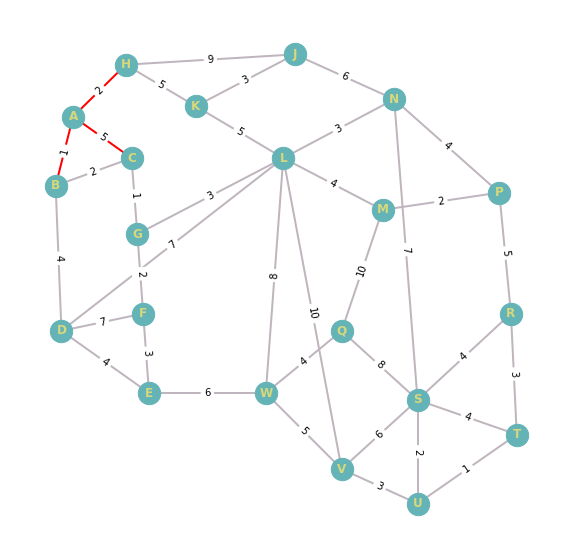

,Short path,Previous path
Node,,
A,0,
B,1,A
C,5,A
D,∞,
E,∞,
F,∞,
G,∞,
H,2,A
J,∞,


In [7]:
highlight_weights = {
    ('A','B'),
    ('A','C'),
    ('A','H')
}
edge_colors=["red" if (u,v) in highlight_weights else "#bfb5be" for u,v in graph.edges()]
draw_graph(graph, pos, node_label, edge_label, edge_colors)

change_short('A', 0)
change_prev('A','')
change_short('B', 1)
change_prev('B','A')
change_short('C', 5)
change_prev('C','A')
change_short('H', 2)
change_prev('H','A')

nodes_df

Nodes visited [A,B]

B-C: 1 + 2

B-D: 1 + 4

Distance from B to C is lower

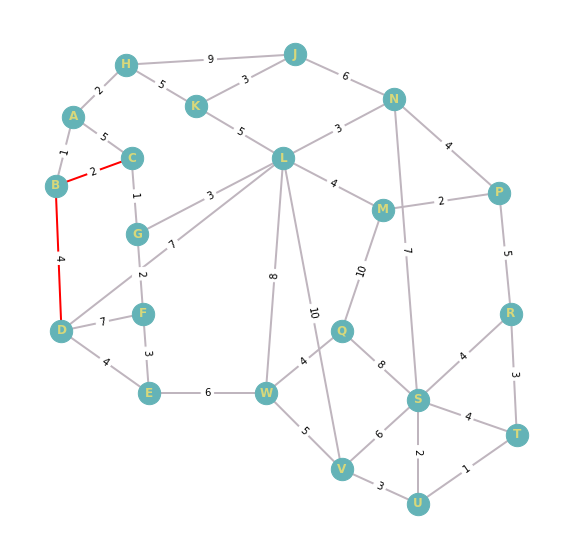

,Short path,Previous path
Node,,
A,0,
B,1,A
C,3,B
D,5,B
E,∞,
F,∞,
G,∞,
H,2,A
J,∞,


In [8]:
highlight_weights = {
    ('B','C'),
    ('B','D')
}
edge_colors=["red" if (u,v) in highlight_weights else "#bfb5be" for u,v in graph.edges()]
draw_graph(graph, pos, node_label, edge_label, edge_colors)

change_short('C', 3)
change_prev('C','B')
change_short('D', 5)
change_prev('D','B')

nodes_df

Node H has the smallest distance, it gets selected next

Nodes visited [A,B,H]

H-J: 2 + 9

H-K: 2 + 5

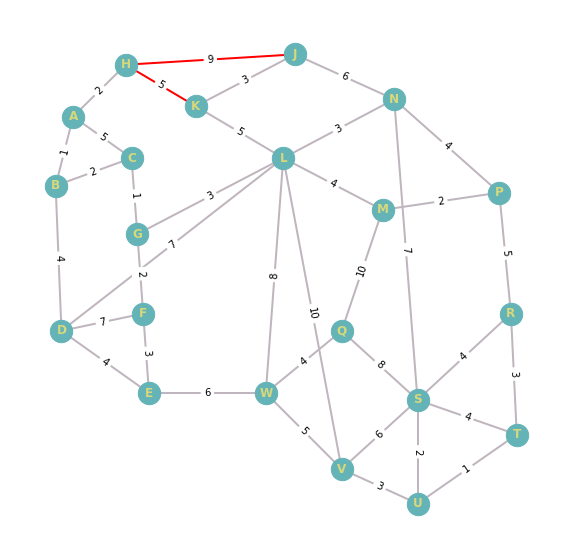

,Short path,Previous path
Node,,
A,0,
B,1,A
C,3,B
D,5,B
E,∞,
F,∞,
G,∞,
H,2,A
J,11,H


In [9]:
highlight_weights = {
    ('H','J'),
    ('H','K')
}
edge_colors=["red" if (u,v) in highlight_weights else "#bfb5be" for u,v in graph.edges()]
draw_graph(graph, pos, node_label, edge_label, edge_colors)

change_short('J', 11)
change_prev('J','H')
change_short('K', 7)
change_prev('K','H')

nodes_df

Node C has the smallest distance, it gets selected next

Nodes visited [A,B,H,C]

C-G: 3 + 1

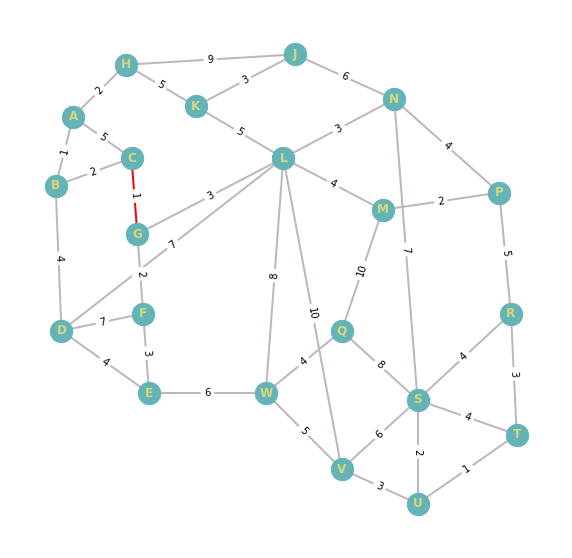

,Short path,Previous path
Node,,
A,0,
B,1,A
C,3,B
D,5,B
E,∞,
F,∞,
G,4,C
H,2,A
J,11,H


In [10]:
highlight_weights = {
    ('C','G')
}
edge_colors=["red" if (u,v) in highlight_weights else "#bfb5be" for u,v in graph.edges()]
draw_graph(graph, pos, node_label, edge_label, edge_colors)

change_short('G', 4)
change_prev('G','C')

nodes_df

Node G has the smallest distance, it gets selected next

Nodes visited [A,B,H,C,G]

G-L: 4 + 3

G-F: 4 + 2

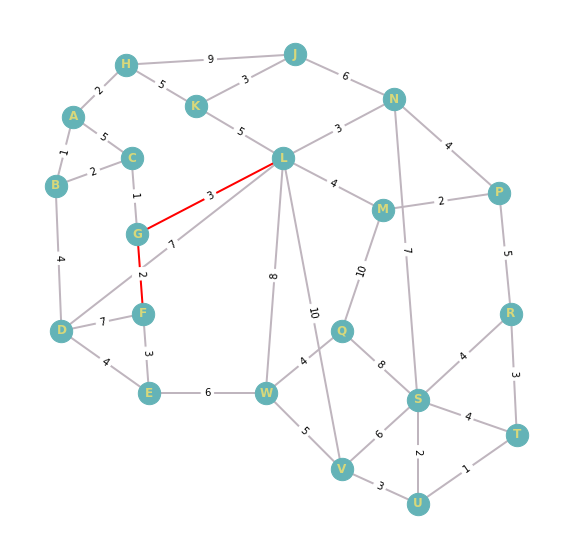

,Short path,Previous path
Node,,
A,0,
B,1,A
C,3,B
D,5,B
E,∞,
F,6,G
G,4,C
H,2,A
J,11,H


In [11]:
highlight_weights = {
    ('G','L'),
    ('G','F')
}
edge_colors=["red" if (u,v) in highlight_weights else "#bfb5be" for u,v in graph.edges()]
draw_graph(graph, pos, node_label, edge_label, edge_colors)

change_short('L', 7)
change_prev('L','G')
change_short('F', 6)
change_prev('F','G')

nodes_df

Node D has the smallest distance and hasn't been visited yet, it gets selected next

Nodes visited [A,B,H,C,G,D]

D-F: 5 + 7

The value of F is higher than the value on the table

D-E: 5 + 4

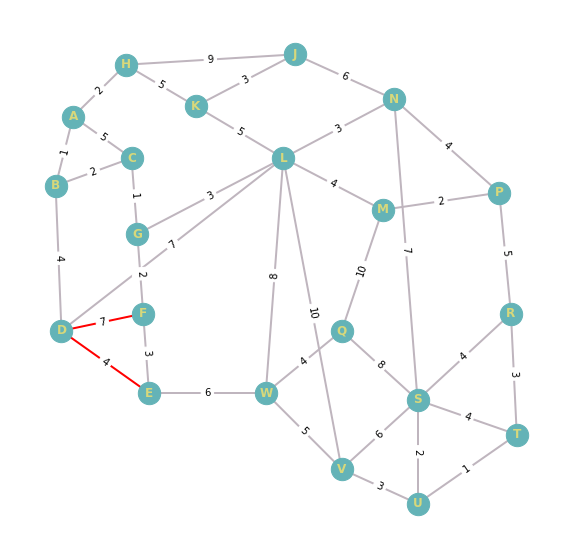

,Short path,Previous path
Node,,
A,0,
B,1,A
C,3,B
D,5,B
E,9,D
F,6,G
G,4,C
H,2,A
J,11,H


In [12]:
highlight_weights = {
    ('D','F'),
    ('D','E')
}
edge_colors=["red" if (u,v) in highlight_weights else "#bfb5be" for u,v in graph.edges()]
draw_graph(graph, pos, node_label, edge_label, edge_colors)

change_short('E', 9)
change_prev('E','D')

nodes_df

Node F has the smallest distance and hasn't been visited yet, it gets selected next

Nodes visited [A,B,H,C,G,D,F]

F-E: 6 + 3

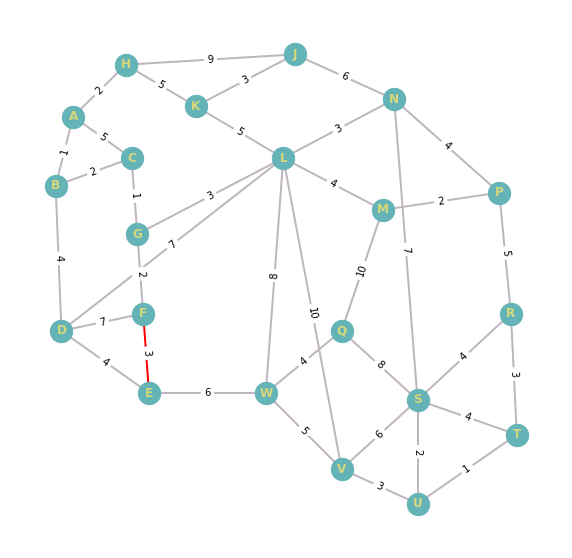

,Short path,Previous path
Node,,
A,0,
B,1,A
C,3,B
D,5,B
E,9,F
F,6,G
G,4,C
H,2,A
J,11,H


In [13]:
highlight_weights = {
    ('E','F')
}
edge_colors=["red" if (u,v) in highlight_weights else "#bfb5be" for u,v in graph.edges()]
draw_graph(graph, pos, node_label, edge_label, edge_colors)

change_prev('E','F')

nodes_df

Node K and L have the smallest distance and hasn't been visited yet, node K gets selected next

Nodes visited [A,B,H,C,G,D,F,K]

K-J: 7 + 3

K-L: 7 + 5

The value of L is higher than the value on table

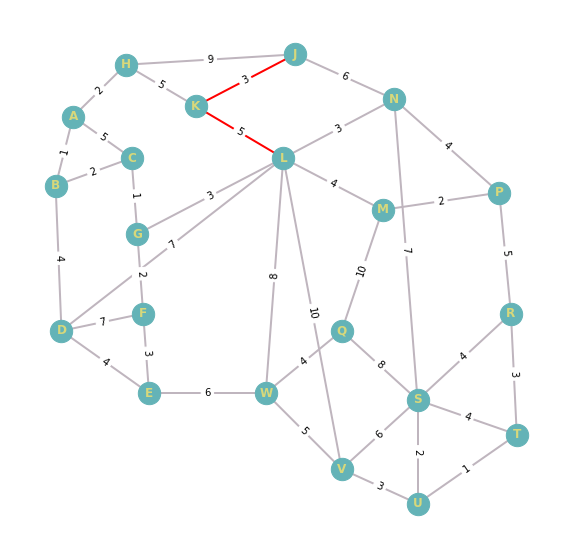

,Short path,Previous path
Node,,
A,0,
B,1,A
C,3,B
D,5,B
E,9,F
F,6,G
G,4,C
H,2,A
J,10,K


In [14]:
highlight_weights = {
    ('J','K'),
    ('L','K')
}
edge_colors=["red" if (u,v) in highlight_weights else "#bfb5be" for u,v in graph.edges()]
draw_graph(graph, pos, node_label, edge_label, edge_colors)

change_short('J', 10)
change_prev('J','K')

nodes_df

Node L has the smallest distance and hasn't been visited yet

Nodes visited [A,B,H,C,G,D,F,K,L]

L-N: 7 + 3

L-M: 7 + 4

L-V: 7 + 10

L-W: 7 + 8

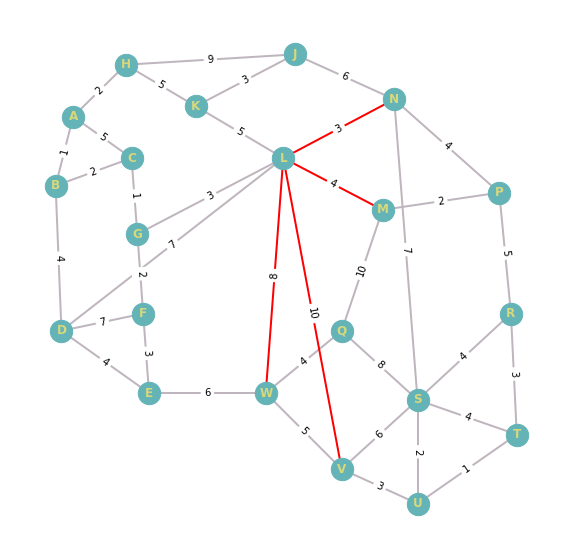

,Short path,Previous path
Node,,
A,0,
B,1,A
C,3,B
D,5,B
E,9,F
F,6,G
G,4,C
H,2,A
J,10,K


In [15]:
highlight_weights = {
    ('L','N'),
    ('L','M'),
    ('L','V'),
    ('W','L')
}
edge_colors=["red" if (u,v) in highlight_weights else "#bfb5be" for u,v in graph.edges()]
draw_graph(graph, pos, node_label, edge_label, edge_colors)

change_short('N', 10)
change_prev('N','L')
change_short('M', 11)
change_prev('M','L')
change_short('V', 17)
change_prev('V','L')
change_short('W', 15)
change_prev('W','L')

nodes_df

Node E has the smallest distance and hasn't been visited yet

Nodes visited [A,B,H,C,G,D,F,K,L,E]

E-W: 9 + 6

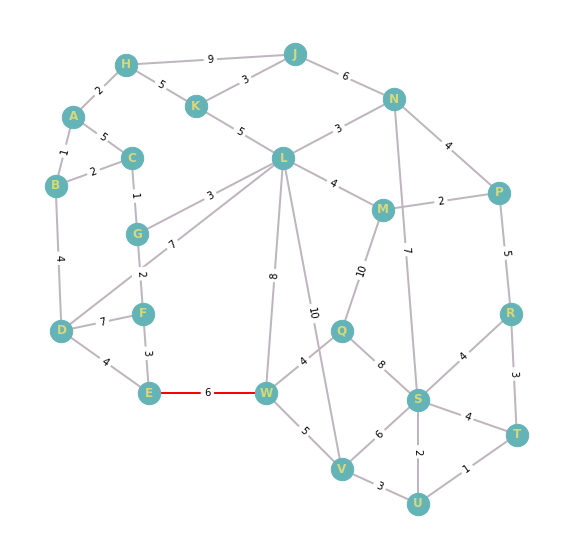

,Short path,Previous path
Node,,
A,0,
B,1,A
C,3,B
D,5,B
E,9,F
F,6,G
G,4,C
H,2,A
J,10,K


In [16]:
highlight_weights = {
    ('E','W')
}
edge_colors=["red" if (u,v) in highlight_weights else "#bfb5be" for u,v in graph.edges()]
draw_graph(graph, pos, node_label, edge_label, edge_colors)

change_short('W', 15)
change_prev('W','E')

nodes_df

Node J and N have the smallest distance and haven't been visited yet, Node J is selected first

Nodes visited [A,B,H,C,G,D,F,K,L,E,J]

J-N: 10 + 6

The value is higher than the current value on the table

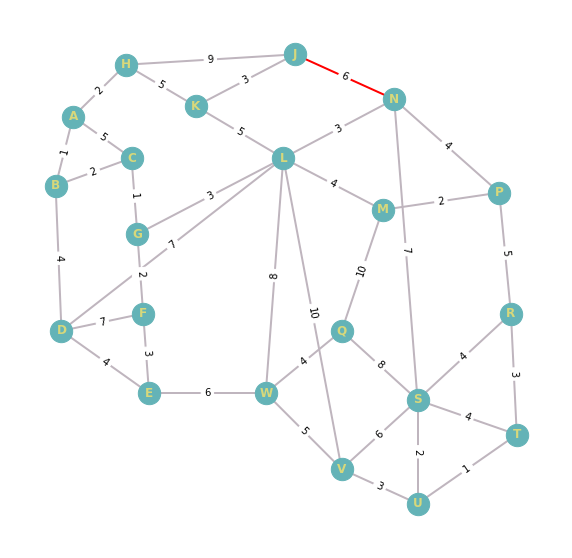

,Short path,Previous path
Node,,
A,0,
B,1,A
C,3,B
D,5,B
E,9,F
F,6,G
G,4,C
H,2,A
J,10,K


In [17]:
highlight_weights = {
    ('J','N')
}
edge_colors=["red" if (u,v) in highlight_weights else "#bfb5be" for u,v in graph.edges()]
draw_graph(graph, pos, node_label, edge_label, edge_colors)

nodes_df

Node N has the smallest distance and hasn't been visited yet

Nodes visited [A,B,H,C,G,D,F,K,L,E,J,N]

N-P: 10 + 4

N-P: 10 + 7

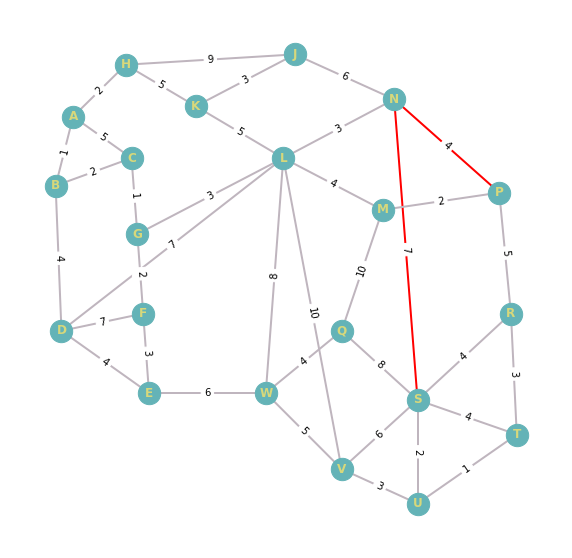

,Short path,Previous path
Node,,
A,0,
B,1,A
C,3,B
D,5,B
E,9,F
F,6,G
G,4,C
H,2,A
J,10,K


In [18]:
highlight_weights = {
    ('N','P'),
    ('N','S')
}
edge_colors=["red" if (u,v) in highlight_weights else "#bfb5be" for u,v in graph.edges()]
draw_graph(graph, pos, node_label, edge_label, edge_colors)

change_short('P', 14)
change_prev('P','N')
change_short('S', 17)
change_prev('S','N')

nodes_df

Node M has the smallest distance and hasn't been visited yet

Nodes visited [A,B,H,C,G,D,F,K,L,E,J,N,M]

M-P: 11 + 2

M-Q: 11 + 10

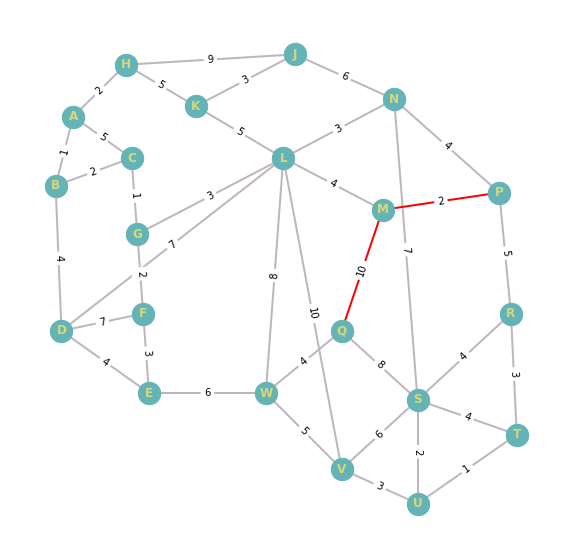

,Short path,Previous path
Node,,
A,0,
B,1,A
C,3,B
D,5,B
E,9,F
F,6,G
G,4,C
H,2,A
J,10,K


In [19]:
highlight_weights = {
    ('M','P'),
    ('M','Q')
}

edge_colors=["red" if (u,v) in highlight_weights else "#bfb5be" for u,v in graph.edges()]
draw_graph(graph, pos, node_label, edge_label, edge_colors)

change_short('P', 13)
change_prev('P','M')
change_short('Q', 21)
change_prev('Q','M')

nodes_df

Node M has the smallest distance and hasn't been visited yet

Nodes visited [A,B,H,C,G,D,F,K,L,E,J,N,M,P]

P-R: 13 + 5

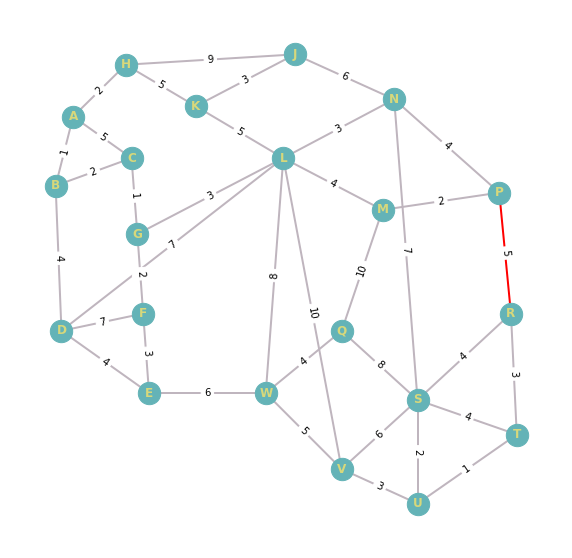

,Short path,Previous path
Node,,
A,0,
B,1,A
C,3,B
D,5,B
E,9,F
F,6,G
G,4,C
H,2,A
J,10,K


In [20]:
highlight_weights = {
    ('P','R')
}

edge_colors=["red" if (u,v) in highlight_weights else "#bfb5be" for u,v in graph.edges()]
draw_graph(graph, pos, node_label, edge_label, edge_colors)

change_short('R', 18)
change_prev('R','P')

nodes_df

Node W has the smallest distance and hasn't been visited yet

Nodes visited [A,B,H,C,G,D,F,K,L,E,J,N,M,P,W]

W-Q: 15 + 4

W-V: 15 + 5

The value of V is higher than the value on table

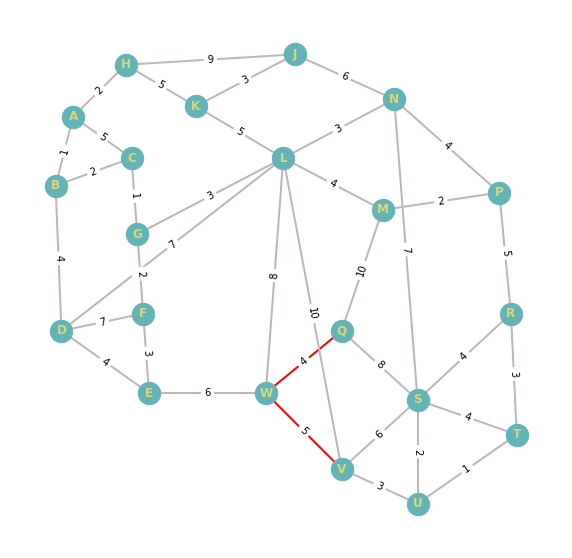

,Short path,Previous path
Node,,
A,0,
B,1,A
C,3,B
D,5,B
E,9,F
F,6,G
G,4,C
H,2,A
J,10,K


In [21]:
highlight_weights = {
    ('W','Q'),
    ('W','V')
}

edge_colors=["red" if (u,v) in highlight_weights else "#bfb5be" for u,v in graph.edges()]
draw_graph(graph, pos, node_label, edge_label, edge_colors)

change_short('Q', 19)
change_prev('Q','W')

nodes_df

Node S and V have the smallest distance and haven't been visited yet, node S is selected first

Nodes visited [A,B,H,C,G,D,F,K,L,E,J,N,M,P,W,S]

S-R: 17 + 4

The value of R is higher than the value on table

S-T: 17 + 4

S-U: 17 + 2

S-V: 17 + 6

The value of V is higher than the value on table

S-Q: 17 + 8

The value of Q is higher than the value on table

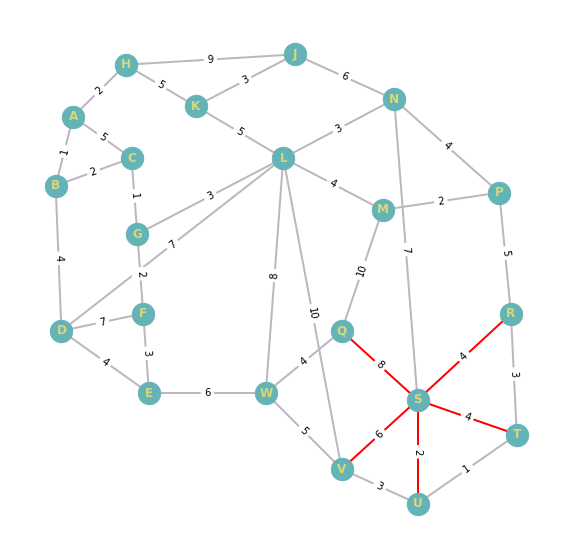

,Short path,Previous path
Node,,
A,0,
B,1,A
C,3,B
D,5,B
E,9,F
F,6,G
G,4,C
H,2,A
J,10,K


In [22]:
highlight_weights = {
    ('S','R'),
    ('S','T'),
    ('S','U'),
    ('V','S'),
    ('Q','S')
}

edge_colors=["red" if (u,v) in highlight_weights else "#bfb5be" for u,v in graph.edges()]
draw_graph(graph, pos, node_label, edge_label, edge_colors)

change_short('T', 21)
change_prev('T','S')
change_short('U', 19)
change_prev('U','W')

nodes_df

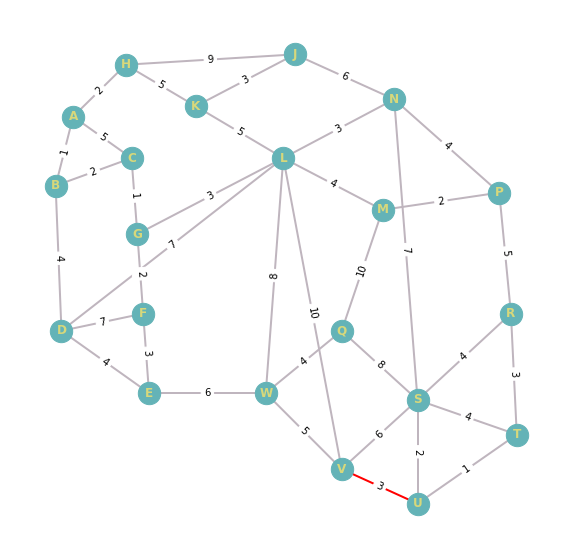

,Short path,Previous path
Node,,
A,0,
B,1,A
C,3,B
D,5,B
E,9,F
F,6,G
G,4,C
H,2,A
J,10,K


In [23]:
highlight_weights = {
    ('V','U')
}

edge_colors=["red" if (u,v) in highlight_weights else "#bfb5be" for u,v in graph.edges()]
draw_graph(graph, pos, node_label, edge_label, edge_colors)

nodes_df

Node R has the smallest distance and haven't been visited yet

Nodes visited [A,B,H,C,G,D,F,K,L,E,J,N,M,P,W,S,V,R]

R-T: 18 + 3

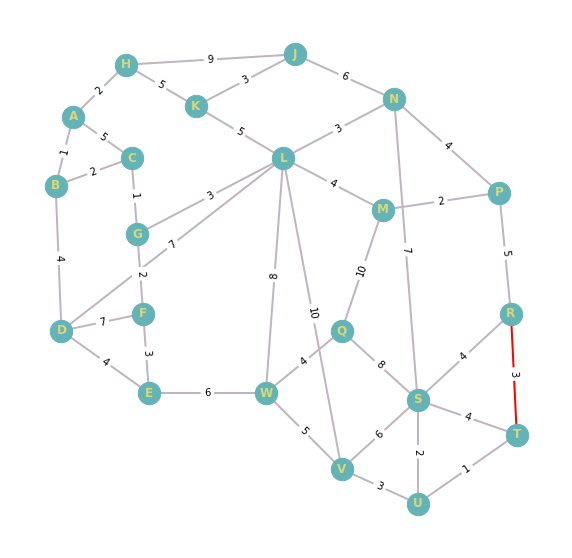

,Short path,Previous path
Node,,
A,0,
B,1,A
C,3,B
D,5,B
E,9,F
F,6,G
G,4,C
H,2,A
J,10,K


In [24]:
highlight_weights = {
    ('R','T')
}

edge_colors=["red" if (u,v) in highlight_weights else "#bfb5be" for u,v in graph.edges()]
draw_graph(graph, pos, node_label, edge_label, edge_colors)

change_prev('T','R')

nodes_df

Node Q and U have the smallest distance and haven't been visited yet, node Q is selected first

Nodes visited [A,B,H,C,G,D,F,K,L,E,J,N,M,P,W,S,V,R,Q]

Node Q already has values from connected nodes

Node U is selected

Nodes visited [A,B,H,C,G,D,F,K,L,E,J,N,M,P,W,S,V,R,Q,U]

U-T: 19 + 1

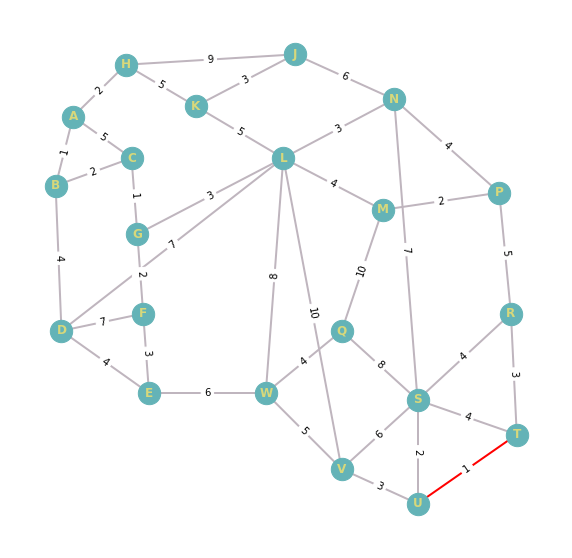

,Short path,Previous path
Node,,
A,0,
B,1,A
C,3,B
D,5,B
E,9,F
F,6,G
G,4,C
H,2,A
J,10,K


In [25]:
highlight_weights = {
    ('T','U')
}

edge_colors=["red" if (u,v) in highlight_weights else "#bfb5be" for u,v in graph.edges()]
draw_graph(graph, pos, node_label, edge_label, edge_colors)

change_short('T', 20)
change_prev('T','U')


nodes_df

Node T has the smallest distance and haven't been visited yet

Nodes visited [A,B,H,C,G,D,F,K,L,E,J,N,M,P,W,S,V,R,Q,U]

Node U already has values from connected nodes

In [26]:
print(calculate_distances(fig1_graph,'A'))

{'A': 0, 'B': 1, 'C': 3, 'D': 5, 'E': 9, 'F': 6, 'G': 4, 'H': 2, 'J': 10, 'K': 7, 'L': 7, 'M': 11, 'N': 10, 'P': 13, 'Q': 19, 'R': 18, 'S': 17, 'T': 20, 'U': 19, 'V': 17, 'W': 15}


As displayed on the table the values represent all nodes shortest path, tracing back the path from node S to node A from the table column previous path we get the following:

S > N > L > G > C > B > A

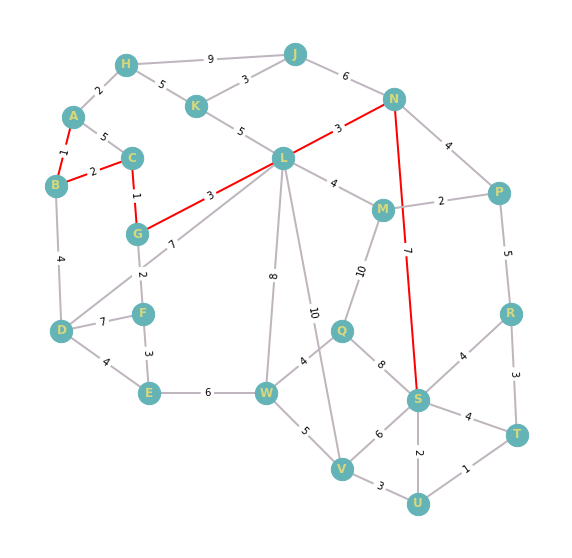

In [27]:
highlight_weights = {
    ('A','B'),
    ('B','C'),
    ('C','G'),
    ('G','L'),
    ('L','N'),
    ('N','S')
}

edge_colors=["red" if (u,v) in highlight_weights else "#bfb5be" for u,v in graph.edges()]
draw_graph(graph, pos, node_label, edge_label, edge_colors)

## 2 - The creator of the puzzle has been told that the A* algorithm is more efficient at finding the shortest path because it uses heuristics. Compare the performance of Dijkstra’s algorithm and the A* search algorithm, referring to heuristics, to find the shortest path to the problem by implementing both algorithms programmatically and comparing the solutions generated in Mark-down. Refer to the complexity of the algorithms and compare the actual time it takes for the solutions to be processed.

In [28]:
#In order to use A* algorithm the graph list used in Dijkstra Algorithm needs to be converted to adjency list

fig1_graph_adj = {}

#Iteration through graph values to populate the list
for vertex, neighbors in fig1_graph.items():
    fig1_graph_adj[vertex] = [(neighbor, weight) for neighbor, weight in neighbors.items()]

In [29]:
from collections import deque

class Graph:

    def __init__(self, adjacency_list):
        self.adjacency_list = adjacency_list

    def get_neighbors(self, v):
        return self.adjacency_list[v]

    # heuristic function with equal values for all nodes
    def h(self, n):
        
        #Heuritisc set by measuring the distance in centimeters from the starting point node A to each node using a ruler
        
        H = {
            'A':0,
            'B':2.5,
            'C':3,
            'D':6.5,
            'E':8.5,
            'F':7,
            'G':4.5,
            'H':2.5,
            'J':7,
            'K':3.5,
            'L':6.5,
            'M':10,
            'N':9.5,
            'P':12,
            'Q':10,
            'R':14,
            'S':13,
            'T':15.5,
            'U':14.5,
            'V':12.5,
            'W':9.5
        }

        return H[n]

    def a_star_algorithm(self, start_node, stop_node):
        # open_list is a list of nodes which have been visited, but who's neighbors
        # haven't all been inspected, starts off with the start node
        # closed_list is a list of nodes which have been visited
        # and who's neighbors have been inspected
        open_list = set([start_node])
        closed_list = set([])

        # g contains current distances from start_node to all other nodes
        # the default value (if it's not found in the map) is +infinity
        g = {}

        g[start_node] = 0

        # parents contains an adjacency map of all nodes
        parents = {}
        parents[start_node] = start_node

        while len(open_list) > 0:
            n = None

            # find a node with the lowest value of f() - evaluation function
            for v in open_list:
                if n == None or g[v] + self.h(v) < g[n] + self.h(n):
                    n = v;

            if n == None:
                print('Path does not exist!')
                return None

            # if the current node is the stop_node
            # then we begin reconstructin the path from it to the start_node
            if n == stop_node:
                reconst_path = []

                while parents[n] != n:
                    reconst_path.append(n)
                    n = parents[n]

                reconst_path.append(start_node)

                reconst_path.reverse()

                #print('Path found: {}'.format(reconst_path))
                return reconst_path

            # for all neighbors of the current node do
            for (m, weight) in self.get_neighbors(n):
                # if the current node isn't in both open_list and closed_list
                # add it to open_list and note n as it's parent
                if m not in open_list and m not in closed_list:
                    open_list.add(m)
                    parents[m] = n
                    g[m] = g[n] + weight

                # otherwise, check if it's quicker to first visit n, then m
                # and if it is, update parent data and g data
                # and if the node was in the closed_list, move it to open_list
                else:
                    if g[m] > g[n] + weight:
                        g[m] = g[n] + weight
                        parents[m] = n

                        if m in closed_list:
                            closed_list.remove(m)
                            open_list.add(m)

            # remove n from the open_list, and add it to closed_list
            # because all of his neighbors were inspected
            open_list.remove(n)
            closed_list.add(n)

        print('Path does not exist!')
        return None
    
#Line of code provided in-class for finding shortest path using A* algorithm

In [30]:
import time

start = time.perf_counter()
result = calculate_distances(fig1_graph,'A')
end = time.perf_counter()

#time diffence multiplied by 1000 to be displayed as miliseconds
time_dif = (end - start) * 1000

print ("Running Dijkstra algorithm the values for each node are the following: ")
print (result)
print(f'\nThe time to run the code is {time_dif:.4f} miliseconds')

Running Dijkstra algorithm the values for each node are the following: 
{'A': 0, 'B': 1, 'C': 3, 'D': 5, 'E': 9, 'F': 6, 'G': 4, 'H': 2, 'J': 10, 'K': 7, 'L': 7, 'M': 11, 'N': 10, 'P': 13, 'Q': 19, 'R': 18, 'S': 17, 'T': 20, 'U': 19, 'V': 17, 'W': 15}

The time to run the code is 0.1380 miliseconds


In [31]:
import time

agraph = Graph(fig1_graph_adj)

start = time.perf_counter()
resultAstar = agraph.a_star_algorithm('A','S')
end = time.perf_counter()

#time diffence multiplied by 1000 to be displayed as miliseconds
time_dif = (end - start) * 1000

print ("Running A* algorithm the path found from node A to no S is: ")
print (resultAstar)
print(f'\nThe time to run the code is {time_dif:.4f} miliseconds')

Running A* algorithm the path found from node A to no S is: 
['A', 'B', 'C', 'G', 'L', 'N', 'S']

The time to run the code is 0.1806 miliseconds


As displayed above, Dijkstra algorithm took 0.138 miliseconds to find the shortests path to each node in the grap, whilst A* took 0.180 mili seconds, 1.5 times longer to find the same path, taking into account that the graph and values are small and fairly simple also the results are displayed in miliseconds, in a more complex and larger dataframe the A* prevails in efficiency.

While the Dijkstra Algorithm visits every node as displayed on the graphs previously, the A star algorithm uses the formula $f(n) = g(n) + h(n)$.

$f(n)$ is the cost of the path from the start node to node $n$ plus the cost from the heuristic function for node $n$

$g(n)$ is the cost of the path from the start node to node $n$

$h(n)$ is the cost from the heuristic function for node $n$

Starting from A the formula is applied for the adjacents nodes

In [39]:
nodes_table_star = {
    "Node": {'A': 0},
    "Column A": {'A': 'A'},
    "Column B": {'A': 'B'}
}

nodes_df_star = pd.DataFrame(nodes_table_star)

nodes_df_star.set_index("Node", inplace=True)

In [43]:
nodes_df_star

,Column A,Column B
Node,,
0,A,B


## References

GeekforGeeks(2023) 'Graph Data Structure And Algorithms' Available at: https://www.geeksforgeeks.org/graph-data-structure-and-algorithms/?ref=lbp (Accessed: 22 October 2023).

Tableau(2003-2023) 'What Is Data Visualization? Definition, Examples, And Learning Resources' Available at: https://www.tableau.com/learn/articles/data-visualization (Accessed: 22 October 2023).

Cambridge Dictionaty(2023) Available at: https://dictionary.cambridge.org/ (Accessed: 22 October 2023).

Matplotlib(2012-2023) 'Matplotlib 3.8.0 documentation' Available at: https://matplotlib.org/stable/ (Accessed: 22 October 2023).

Aric A. Hagberg, Daniel A. Schult and Pieter J. Swart, “Exploring network structure, dynamics, and function using NetworkX”, in Proceedings of the 7th Python in Science Conference (SciPy2008), Gäel Varoquaux, Travis Vaught, and Jarrod Millman (Eds), (Pasadena, CA USA), pp. 11–15, Aug 2008

TechTarget(1999-2023) 'Data Visualization' Available at: https://www.techtarget.com/searchbusinessanalytics/resources/Data-visualization (Accessed: 25 October 2023).

Python (2001-2023) 'time — Time access and conversions' Available at: https://docs.python.org/3/library/time.html (Accessed: 28 October 2023).